# [CptS 215 Data Analytics Systems and Algorithms](https://github.com/gsprint23/cpts215)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
# Decision Trees

Learner objectives for this lesson:
* Understand what machine learning is
* Understand the difference between supervised vs. unsupervised machine learning
* Understand a decision tree
* Understand entropy
* Implement the ID3 tree building algorithm


## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Data Science from Scratch](https://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X/ref=sr_1_1?ie=UTF8&qid=1491521130&sr=8-1&keywords=joel+grus) by Joel Grus
* [Data Mining](https://www.amazon.com/Data-Mining-Practical-Techniques-Management/dp/0123748569/ref=sr_1_2?ie=UTF8&qid=1491521294&sr=8-2&keywords=data+mining+ian) by Ian Witten

## Machine Learning
At a high level, machine learning is building and using models that are learned from data. Machine learning is a subset of artificial intelligence, and it greatly overlaps with data mining. Let's see the "unofficial" definitions for these areas from Wikipedia:
* [Data mining](https://en.wikipedia.org/wiki/Data_mining): The computational process of discovering patterns in large data sets involving methods at the intersection of artificial intelligence, machine learning, statistics, and database systems. It is an interdisciplinary subfield of computer science. The overall goal of the data mining process is to extract information from a data set and transform it into an understandable structure for further use.
    * Take away point: Discovering and using patterns in data
* [Artificial intelligence](https://en.wikipedia.org/wiki/Artificial_intelligence): The study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of success at some goal. Colloquially, the term "artificial intelligence" is applied when a machine mimics "cognitive" functions that humans associate with other human minds, such as "learning" and "problem solving" (known as Machine Learning).
    * Take away point: Implementing human-cognition on a machine
* [Machine learning](https://en.wikipedia.org/wiki/Machine_learning): The subfield of computer science that, according to Arthur Samuel in 1959, gives "computers the ability to learn without being explicitly programmed." Evolved from the study of pattern recognition and computational learning theory in artificial intelligence, machine learning explores the study and construction of algorithms that can learn from and make predictions on data â€“ such algorithms overcome following strictly static program instructions by making data driven predictions or decisions, through building a model from sample inputs.
    * Take away point: Learning from and making predictions on data
    
At WSU, we have full classes in each one of these areas. In CptS 215, we are learning the data structures that underlie many of the algorithms in these fields. For example, we have already learning about the $k$-means clustering algorithm and how it can be used to group data examples together. This algorithm is an example of an *unsupervised* machine learning algorithm.

## Supervised Learning
Supervised learning requires labeled training data from a "supervisor." Such labels are considered the ground-truth for describing the data. The label comes from a knowledgeable expert and can be used to learn what information describes different labels.

Supervised learning is typically composed of training and testing. We will train a machine (AKA a student, learner, mathematical model) to learn a concept. Then we will test the machine's learned concept by applying their knowledge.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Supervised_machine_learning_in_a_nutshell.svg/2000px-Supervised_machine_learning_in_a_nutshell.svg.png" width="650">
(image from [https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Supervised_machine_learning_in_a_nutshell.svg/2000px-Supervised_machine_learning_in_a_nutshell.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Supervised_machine_learning_in_a_nutshell.svg/2000px-Supervised_machine_learning_in_a_nutshell.svg.png))

### Training
As an example, suppose you are trying to teach someone (say a student) who has no notion of a cat or dog, the concept of cat vs. dog. You might first show the student some pictures of cats and say, "these are cats". Then you might show the person some pictures of dogs and say, "these are dogs". The set of cat and dog images is called the *training set*, a set of examples (also known as features). For example, consider the following cat vs. dog training set:

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/cat_dog_training.png" width="500"/>

The student is going to look at different attributes of the image to try to learn a model of cat and a model of a dog. In doing so, the student will identify some aspects (or *features*) of the examples that distinguish a cat vs a dog. The features might include:

|Feature|Cat value|Dog value|
|-|-|-|
|Tongue out|No|Yes|
|Fur color|Light|Dark|
|Ears up|Yes|No|

What other features did you come up with?

#### Building a Model
A model to represent cat vs. dog based on these features might be rule-based:

>if tongue is out and the fur is dark and the ears are down then this is a dog

We will see later how we can use a tree as a model to represent a classification such as dog vs. cat!

### Testing
Now, suppose we want to apply the student's learned conception of dog vs. cat by providing the student with a new, unseen example:

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/cat_or_dog.png" width="150"/>

Based on the above features, this image has the tongue out (dog), light fur color (cat), and ears up (cat). Thus our student would likely classify this image as a cat. But wait! We (the expert supervisors) know this is a dog (a puppy, but a dog none the less). Our training set didn't include any images that were as borderline cat/dog as this testing example. As you can see, the examples that comprise your training set and the features that are utilized greatly impact the accuracy of the learner, and consequently the model that is built. 

### Supervised Models
The field of supervised machine learning is quite vast. We are only going to just scratch the surface enough to implement a machine learning model called a decision tree. You will learn more about machine learning in your future data analytics classes :) For the inquiring minds, here are a few of the most popular supervised learning models with links to find out more information about them:
* [Decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)
* [Support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine)
* [Naive Bayes'](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
* [Neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

There is also a great [machine learning course](https://www.coursera.org/learn/machine-learning?utm_source=gg&utm_medium=sem&campaignid=685340575&adgroupid=32639001781&device=c&keyword=machine%20learning%20tutorial&matchtype=e&network=g&devicemodel=&adpostion=1t2&creativeid=176448312903&hide_mobile_promo&gclid=Cj0KEQjwxbDIBRCL99Wls-nLicoBEiQAWroh6s653zQm-VeTv7AfhYWijaykf_XRX-NEbfMaZ18_lHQaAhlM8P8HAQ) by Andrew Ng on Coursera. Check it out!

## An Aside: Unsupervised Learning
Unsupervised learning does not require labeled training data. Information learned from the examples is data-driven and includes the process of discovering and describing patterns in the data. 

For example, to apply unsupervised learning to our cat vs. dog example, we would not try to "train" our student to learn the notion of "cat" or "dog". Instead, we would have our student look for patterns in the data, or perhaps a natural grouping. 

Here are our cat-dog training examples sorted in order based on the feature fur color:

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/cat_dog_fur_ordering.png" width="500"/>

We could apply a clustering algorithm, such as $k$-means clustering that we have already learned and implemented, to the data to reveal two natural groups in the data ($k = 2$):

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/cat_dog_grouping.png" width="500"/>

Note that these two groups, blue and red, are not representative of cat and dog, since we have no cat/dog labels!

Now, upon seeing a new example, we can determine the new examples membership to either the blue group or the red group:

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/cat_dog_membership.png" width="500"/>

Like supervised machine learning, there are several unsupervised machine learning algorithms. Here are a few of the most popular unsupervised learning models with links to find out more information about them:
* [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) such as k-means, hierarchical, and mixture models
    * Note: we will cover hierarchical clustering when we cover trees!
* [Anomaly (outlier) detection](https://en.wikipedia.org/wiki/Anomaly_detection)
* [Artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network#Unsupervised_learning)

## Decision Trees
A decision tree uses a tree to represent a number of possible *decision paths* and an outcome for each path. Decision trees are a popular machine learning model because they are easy to read and interpret, the decision path for unseen data is transparent, and when used in more advanced machine learning algorithms (random forests, ensemble learning, etc.) they form quite powerful predictive models. Decision trees can be trained to predict categorical outcomes (classification trees) or numeric outcomes (regression trees). We are going to focus on *binary* classification trees, trees that predict one of two possible categorical outcomes. For example, predicting "hire" or "no hire" for potential job candidates is an example of a binary classification problem.

Non-leaf nodes (decision nodes) in a decision tree involve testing a particular feature, or attribute, typically against a constant value. Leaf nodes in a decision tree represent a classification, a set of classifications, or a probability distribution over all possible classifications that applies to all instances that reach the leaf.

Let's take a look at an example. Suppose we have built a tree to classify whether a passenger aboard the [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) survived the shipwreck or not:
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" width="400"/>

(image from [https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png))

Where "sex" is the gender of the passenger, "age" is the age of the passenger in years (fractional if age is less than one), and "sibsp" is the number of siblings/spouses aboard the vessel.

Let's walk through a few examples of making a prediction for different passengers using this tree. To classify an example passenger as "survived" or "died" the example is routed down the tree according to the values of its attributes tested in successive nodes. When a leaf node is reached the example is classified based on the class assigned to the leaf.

|sex|age|sibsp|prediction|
|-|-|-|-|
|female|30|0|survived|
|male|45|2|died|
|male|8|0|survived|
|male|6|3|died|


## Classification Tree Implementation
To implement a classification tree, we are going to have to decide what questions to ask (and in what order) to partition our dataset into a decision tree structure. To do this, we need to find out which features are the most informative. A feature that clearly divides the examples is a good feature to use in our tree. 

### Entropy
Let's first discuss the notion of *entropy*. Entropy is going to be our measure of how much uncertainty is contained in the data. If all examples in a dataset belong to the same class, then there is no uncertainty about which class these examples belong to and therefore low entropy. If the examples in a dataset are evenly spread across different classes, then there is a high amount of uncertainty and therefore high entropy.

(notation adopted from Joel Grus)

To code up a function to compute the entropy of a data set, we need a mathematical definition of entropy. Let $S$ by a dataset contain examples that each belong to one of a finite number ($n$) of classes $C_{1},...,C_{n}$. If $P_{i}$ is the proportion of data labeled as class $C_{i}$, then entropy $H$ of the dataset $S$ is defined as:

$$H(S) = -p_{1} log_{2} p_{1} - ... - p_{n} log_{2} p_{n}$$

such that $0 log 0 = 0$. Each term $-p_{i} log_{2} p_{i}$ is close to zero when $p_{i}$ is either close to zero or close to one:

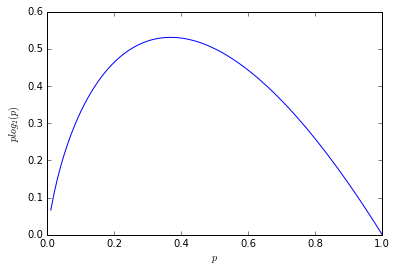

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(0.01, 1.01, 0.01)
plogp = -p * np.log2(p)
plt.xlabel("$p$")
plt.ylabel("$p log_{2}(p)$")
plt.plot(p, plogp)

The summation of $H(s)$ will be small when each $p_{i}$ is close to zero or close to one (most examples belong to a single class) and will be large when each $p_{i}$ is close to ~0.5 (the examples are spread across multiple classes). Let's write the code to represent this mathematical behavior.

In [3]:
from collections import Counter

def compute_entropy(class_probabilities):
    '''
    class_probabilities is a list of class probabilities
    '''
    terms = [-pi * np.log2(pi) for pi in class_probabilities if pi] # ignore zero probabilities
    H = np.sum(terms)
    return H

def compute_class_probabilities(instance_labels):
    '''
    instance_labels is a list of each examples' class label
    '''
    num_examples = len(instance_labels)
    counts = list(Counter(instance_labels).values())
    probabilities = np.array(counts) / num_examples
    return probabilities

def compute_subset_entropy(subset):
    '''
    subset is a list of instances as two-item tuples (attributes, label)
    '''
    labels = [label for _, label in subset]
    probabilities = compute_class_probabilities(labels)
    entropy = compute_entropy(probabilities)
    return entropy
    
# all in one class -> low uncertainty -> low entropy
x = np.array([5, 5, 5, 5, 5, 1, 5, 2, 5, 5])
cps = compute_class_probabilities(x)
entropy = compute_entropy(cps)
print(cps, entropy)

# even spread across classes -> high uncertainty -> high entropy
x = np.array([5, 5, 5, 1, 1, 1, 2, 2, 2, 2])
cps = compute_class_probabilities(x)
entropy = compute_entropy(cps)
print(cps, entropy)

[ 0.1  0.1  0.8] 0.921928094887
[ 0.3  0.4  0.3] 1.57095059445


Now, we are ready to apply our measurement of entropy to build our tree. As we construct our tree, we are going to need to figure out what decision to make at our decision nodes. To do this, we are going to partition our data set $S$ into subsets $S_{1},...,S_{m}$ containing proportions $q_{1},...,q_{m}$ of the data. We can then compute the entropy of the partition as the weighted sum of each subset's entropy:

$$H = -q_{1} H(S_{1}) + ... + q_{m} H(S_{m})$$

Ideally, we want a partition to have low entropy if it splits the data into subsets that have low entropy and high entropy if it splits the data insto subsets that are large and have high entropy.

In [4]:
def compute_partition_entropy(subsets):
    '''
    subsets is a list of class label lists
    '''
    num_examples = np.sum([len(s) for s in subsets])
    entropies = [(len(s) / num_examples) * compute_subset_entropy(s) for s in subsets]
    partition_entropy = np.sum(entropies)
    return partition_entropy

### ID3 Algorithm
Next, we need to add our infrastructure to read in the data, build a tree, and make classifications on unseen data. To build a tree, we are going to implement the ID3 algorithm. Starting with the entire dataset and all attributes, we are going to follow the following process to build a tree (from Joel Grus' text):
1. If the data all have the same label, then create a leaf node that predicts that label and then stop.
1. If the list of attributes is empty (i.e. there are no more possible questions to ask), then create a leaf node that predicts the most common classification label and then stop.
1. Otherwise, try partition the data by each of the attributes.
    1. Choose the partition with the lowest partition entropy.
    1. Add a decision node based on the chosen attribute.
    1. Recur on each partitioned subset using the remaining attributes.
    
> This is what's known as a "greedy" algorithm because, at each step, it chooses the most immediately best option. Given a dataset, there may be a more optimal tree with a worse-looking first move. If so, this algorithm won't find it. Nonetheless, it is relatively easy to understand and implement, which makes it a good place to being exploring decision trees.

### Example Dataset
To implement the ID3 algorithm step by step, we will use Joel Grus' example dataset. In this dataset, each instance example is an attribute list describing a job candidate:
* Level of expertise (string)
* Preferred language (string)
* Whether she is active on twitter (boolean)
* Whether she has a PhD (boolean)
* Interviewed well? (boolean)

The classification for this dataset defines whether or not the job candidate interviewed well (True) or not (False).

In [5]:
inputs = [
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
        ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
        ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
        ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
        ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
        ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
    ]

### ID3 Implementation

In [6]:
def partition_by(inputs, attribute):
    '''
    inputs is a list of tuple pairs: (attribute_dict, label)
    attribute is the proposed attribute to partition by
    returns a dictionary of attribute value: input subsets pairs
    '''
    subsets = {}
    for example in inputs:
        attribute_value = example[0][attribute]
        if attribute_value in subsets:
            subsets[attribute_value].append(example)
        else: # add this attribute_value to the dict
            subsets[attribute_value] = [example]
    return subsets

def partition_entropy_by(inputs, attribute):
    '''
    compute the partition
    compute the entropy of the partition
    '''
    subsets = partition_by(inputs, attribute)
    entropies = compute_partition_entropy(subsets.values())
    return entropies

def find_min_entropy_partition(inputs, attributes=None):
    '''
    
    '''
    if attributes is None:
        attributes = list(inputs[0][0].keys())
    partition_entropies = []
    for attribute in attributes:
        partition_entropy = partition_entropy_by(inputs, attribute)
        print(attribute, partition_entropy)
        partition_entropies.append(partition_entropy)
    min_index = np.argmin(partition_entropies)
    return attributes[min_index]
        
attribute = find_min_entropy_partition(inputs)
print(attribute)

phd 0.892158928262
lang 0.860131712855
tweets 0.788450457308
level 0.693536138896
level


We see the entropy values for splitting on each possible attribute. The attribute `level` gives the lowest entropy so this will be our first attribute to split on in our decision tree. Now comes the part of actually building the tree. We are going to follow Joel Grus' implementation and define a *tree* to be one of the following:
* `True` (leaf node): positive classification
* `False` (leaf node): negative classification
* `(attribute, subtree_dict)` (decision node): a tuple that classifies an example by `subtree_dict` using `attribute`

To handle a missing (or unexpected) attribute value, we'll add a `None` key that just predicts the most common label (not a good idea if `None` is a valid attribute value in the dataset, which isn't the case for our job candidate dataset).

In [7]:
def build_tree(inputs, split_candidates=None):
    '''
    implements the ID3 algorithm to build a decision tree
    '''
    if split_candidates is None:
        # this is the first pass
        split_candidates = list(inputs[0][0].keys())
        
    num_examples = len(inputs)
    # count Trues and Falses in the examples
    num_trues = len([label for attributes, label in inputs if label == True])
    num_falses = num_examples - num_trues
    
    # part (1) in the ID3 algorithm -> all same class label
    if num_trues == 0: # no trues, this is a False leaf node
        return False
    if num_falses == 0: # no falses, this is a True leaf node
        return True
    
    # part (2) in the ID3 algorithm -> list of attributes is empty -> leaf node with majority class label
    if not split_candidates: 
        return num_trues >= num_falses
    
    # part (3) in ID3 algorithm -> split on best attribute
    split_attribute = find_min_entropy_partition(inputs, split_candidates)
    partitions = partition_by(inputs, split_attribute)
    new_split_candidates = split_candidates.remove(split_attribute)
    
    # recursively build the subtrees
    subtrees = {}
    for attribute_value, subset in partitions.items():
        subtrees[attribute_value] = build_tree(subset, new_split_candidates)
        
    # missing (or unexpected) attribute value
    subtrees[None] = num_trues > num_falses
    
    return (split_attribute, subtrees)

tree = build_tree(inputs)
print(tree)

phd 0.892158928262
lang 0.860131712855
tweets 0.788450457308
level 0.693536138896
phd 0.950977500433
lang 0.4
tweets 0.0
level 0.970950594455
phd 0.0
lang 0.950977500433
tweets 0.950977500433
level 0.970950594455
('level', {'Senior': ('tweets', {'no': False, None: False, 'yes': True}), 'Mid': True, None: True, 'Junior': ('phd', {'no': True, None: True, 'yes': False})})


<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/job_candidate_tree.png" width="700"/>

### Classifying Unseen Data
For new, unseen examples, we want to use our tree to make classifications! Since we already built our tree, all we need to do is route our new example through the tree, following different branches based on the example's attribute values. Eventually we will reach a leaf node and that will be our classification for the example.

In [8]:
def classify(tree, new_example):
    '''
    classify new_example using decision tree
    '''
    # leaf node, return value
    if tree in [True, False]:
        return tree

    # decision node, unpack the attribute to split on and subtrees
    attribute, subtree_dict = tree
    
    subtree_key = new_example.get(attribute) # get return None if attribute not in new_example dict
    if subtree_key not in subtree_dict:
        subtree_key = None # use None subtree if no subtree for key
        
    subtree = subtree_dict[subtree_key]
    label = classify(subtree, new_example)
    return label

ex1 = {"level": "Junior", "lang": "Java", "tweets": "yes", "phd": "no"} # True
ex2 = {"level": "Junior", "lang": "Java", "tweets": "yes", "phd": "yes"} # False
ex3 = {"level": "Intern"} # True
ex4 = {"level": "Senior"} # False

print(classify(tree, ex1))
print(classify(tree, ex2))
print(classify(tree, ex3))
print(classify(tree, ex4))

True
False
True
False


## Decision Tree Summary
We only scratched the surface on decision trees! In future data analytics and machine learning classes you will cover them in more detail. Some topics related to decision trees that are important to note:
* We do not want to construct a tree that is *overfit* for our training dataset and cannot generalize well to new examples. One approach to prevent overfitting is called [pruning](https://en.wikipedia.org/wiki/Pruning_(decision_trees)).
* [Random forests](https://en.wikipedia.org/wiki/Random_forest) is a [*ensemble* machine learning algorithm](https://en.wikipedia.org/wiki/Ensemble_learning) that trains a collection (forest) of decision trees. Random Forests help address overfitting and can boost classification accuracy.
* Evaluating the accuracy of a classifier is important. To do this, we want a large, representative dataset that we can split into a training set, a validation set (for tuning parameters, such as pruning), and a testing set (to actually measure the accuracy).
* Your initial set of attributes can greatly impact the performance of a decision tree. We don't want to include attributes that have a high number of possible values (e.g. approaching the number of examples in the dataset) and we don't want to include attributes that noisy.